# Taller 4

MINE-4101: Applied Data Science  
Universidad de los Andes  

Estudiantes:
* Alejandra Guerrero
* Luis Enrique Garcia
* Diego Alejandro Peña

In [1]:
#!pip install --upgrade pandas-profiling

## 1. Limpieza y preparación de datos

### 1.1 Cargando las librerías y conjunto de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, plot_roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from xgboost import XGBClassifier

from pandas_profiling import ProfileReport
from joblib import dump

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\aguer\anaconda3\envs\cda_talleres\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Cargando el conjunto de datos

In [5]:
df_training = pd.read_json("./datos/DataSet_Entrenamiento_v1.json")
df_prediction = pd.read_json("./datos/DataSet_Prediccion.json")

In [6]:
# Primera revisión de los datos
df_training.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [7]:
# Revisión del tipo de datos
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


In [8]:
# Revisión de una fila completa
df_training.loc[288]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 288, dtype: object

Dimensiones de los conjuntos de datos

In [9]:
print("Entrenamiento: ", df_training.shape)
print("Predicción: ", df_prediction.shape)

Entrenamiento:  (6000, 21)
Predicción:  (43, 20)


### 1.2 Valores nulos y/o duplicados

Revisión de filas duplicadas, no se encontraron registros duplicados.

In [10]:
df_training.duplicated().sum()

0

Identificación de las columnas que tienen valores nulos, se concluye que no hay valores sin informar.

In [11]:
df_training.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Análisis exploratorio de datos

### 2.1 Análisis de datos

Ejecutando un reporte inicial de los datos

In [12]:
profile = ProfileReport(df_training)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Tras el análisis realizado por el reporte, podemos observar que:
* La variable objetivo se encuentra desbalanceada.
* El atributo CustormeID es un identificador único para cada registro, por lo que no aporta información.
* Existen tres variables numéricas solamente: Tenure, MonthlyCharges y TotalCharges. 
* Al leer los datos el atributo TotalCharges no es leído como numérico, así que se debe realizar la converión correspondiente.
* Consultando y comparando con el diccionario de datos, no existen inconsistencias en los valores de los atributos categóricos.
* Algunas variables tienen más de dos tipos de valores negativos, los cuáles se pueden unir. Ejemplo: No y No internet service.

En cuánto a la correlación entre los atributos, se pudo observar que:
* Los atributos InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies se encuentran altamente correlacionadas entre sí.
* PhoneService y MultipleLines se encuentran altamente correlacionados
* MonthlyCharges esta altamente correlacionada con: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV y StreamingMovies.

In [13]:
# Creación de función para ver por qué TotalCharges no es de tipo float
def error_in_format(x):
    try:
        int(x)       
        return False
    except:
        return True

In [14]:
# Using the function for validation
df_training.loc[df_training["TotalCharges"].apply(error_in_format)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
288,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
553,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
736,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1040,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2831,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3215,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3669,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
4507,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
5859,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
5943,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


El campo TotalCharges puede venir sin información, es un aspecto a considerar en la transformación de los datos.

#### Análisis de Churn y MonthlyCharges

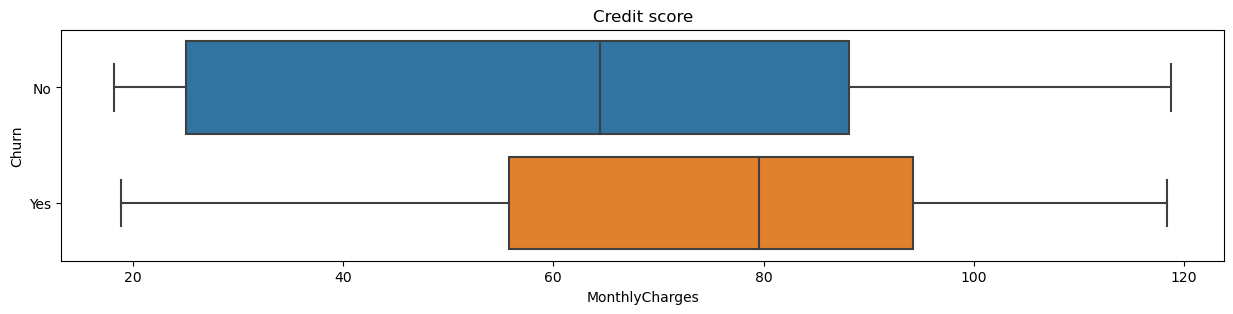

In [15]:
plt.figure(figsize = (15, 3))
sns.boxplot(data = df_training, x = 'MonthlyCharges', y = 'Churn', orient = 'h')
plt.title('Credit score')
plt.show()

Las personas que renuncian a los servicios, suelen pagar más mensualmente que quienes no renuncian a esos servicios.

## 3. Procesamiento de datos

División del conjunto de datos en entrenamiento y validación (ya existe un conjunto de datos para la predicción)

In [16]:
X_train, X_validation, Y_train, Y_validation = train_test_split(df_training.drop(columns='Churn'), df_training['Churn'].replace({'No': 0, 'Yes': 1}), test_size=0.2, random_state=0)

In [17]:
print("Dimensiones X entrenamiento: ", X_train.shape)
print("Dimensiones X validación: ", X_validation.shape)
print("Dimensiones Y entrenamiento: ", Y_train.shape)
print("Dimensiones Y validación: ", Y_validation.shape)

Dimensiones X entrenamiento:  (4800, 20)
Dimensiones X validación:  (1200, 20)
Dimensiones Y entrenamiento:  (4800,)
Dimensiones Y validación:  (1200,)


### 3.1. Integración del proceso de transformación de datos, entrenamiento y predicción

In [18]:
# Función que transforma TotalCharges a valor numérico
def castToNumber(df):
    df['TotalCharges'] = df_training['TotalCharges'].replace('', np.nan).astype('float')
    return df

In [19]:
# Función transformer que transforma TotalCharges a valor numérico
castToInt = FunctionTransformer(func=castToNumber, validate=False)

In [20]:
# Función que estandariza las opciones negativas
def changeValues(df):
    df['MultipleLines'] = df_training['MultipleLines'].replace('No phone service', 'No')
    df['OnlineSecurity'] = df_training['OnlineSecurity'].replace('No internet service', 'No')
    df['OnlineBackup'] = df_training['OnlineBackup'].replace('No internet service', 'No')
    df['DeviceProtection'] = df_training['DeviceProtection'].replace('No internet service', 'No')
    df['TechSupport'] = df_training['TechSupport'].replace('No internet service', 'No')
    df['StreamingTV'] = df_training['StreamingTV'].replace('No internet service', 'No')
    df['StreamingMovies'] = df_training['StreamingMovies'].replace('No internet service', 'No')
   
    return df

In [21]:
# Función transformer que estandariza las opciones negativas
changeNoValues = FunctionTransformer(func=changeValues, validate=False)

Pipeline con las transformaciones que requieren los datos
1. Cambiar el tipo de dato del campo TotalCharges
2. Estandarizar las opciones negativas
3. Convertir los valores booleanos o duales en números
4. Convertir los valores categóricos en distintas columnas
5. Imputación de valores no informados
6. Eliminación de columnas irrelevantes para el modelo

In [22]:
# Pipeline con las transformaciones que requieren los datos
pipeline = Pipeline([
    #('castToInt', castToInt),
    #('changeNoValues', changeNoValues),
    ('transformer', ColumnTransformer([
        ('drop_columns', 'drop', ['customerID', 'TotalCharges']),
        ('ordinal', OrdinalEncoder(), ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'PaymentMethod',
                        'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']),
        ('categorical', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), ['InternetService', 'Contract'])
        #('num', SimpleImputer(strategy='mean', missing_values=np.nan, fill_value=None), ['TotalCharges'])                        
    ], remainder = 'passthrough')),
    ('poly', 'passthrough'),
    ('normalizer', StandardScaler()),
    ('classifier',  DecisionTreeClassifier())
]) 

In [23]:
#pipeline.fit(X_train, Y_train)

### 3.2. Búsqueda automática del mejor modelo

Teniendo en cuenta que la variable objetivo es categórica, decimos que estamos ante un problema de clasificación, por lo que implementaremos modelos de clasificación. A continuación se configuran los diversos modelos a entrenar: Decision Tree, Logistic Regression, Random Forest, XGBoost y KNeighbors.

In [24]:
# Parámetros de los diversos modelos a entrenar
param_grid = [
    {
        'classifier': [DecisionTreeClassifier(random_state = 20)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth' : [2, 3, 4, 6, 8],
        'classifier__class_weight': ['balanced', None]
    },
    {
        'poly': [PolynomialFeatures()],
        'poly__degree': [1, 2, 3],
        'normalizer': [StandardScaler(), MinMaxScaler()], 
        'classifier': [LogisticRegression()],
        'classifier__penalty': ['none', 'l1', 'l2'], 
        'classifier__C': [0.1, 1.], #[0.001, 0.01, 0.1, 1.],
        'classifier__class_weight': ['balanced', None]
    },
    {
        'classifier': [RandomForestClassifier(random_state = 20)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth' : [2, 3, 4, 6, 8], 
        'classifier__class_weight': ['balanced', None]
    },
    {
        'classifier': [XGBClassifier(random_state = 20)],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth' : [2, 3, 4, 6, 8],
        'classifier__n_estimators' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors' : [2, 5, 10, 25, 50]
    }
]

In [25]:
# Configuración de la grilla de ejecución de los distintos modelos
grid = GridSearchCV(estimator = pipeline, param_grid = param_grid, scoring = ['roc_auc'], n_jobs = 1, refit = 'roc_auc', cv = 5, return_train_score = True, verbose = 3)

In [26]:
# Entrenamiento del modelo
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 207 candidates, totalling 1035 fits
[CV 1/5] END classifier=DecisionTreeClassifier(random_state=20), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=2; roc_auc: (train=0.788, test=0.787) total time=   0.0s
[CV 2/5] END classifier=DecisionTreeClassifier(random_state=20), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=2; roc_auc: (train=0.782, test=0.787) total time=   0.0s
[CV 3/5] END classifier=DecisionTreeClassifier(random_state=20), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=2; roc_auc: (train=0.786, test=0.770) total time=   0.0s
[CV 4/5] END classifier=DecisionTreeClassifier(random_state=20), classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_depth=2; roc_auc: (train=0.786, test=0.770) total time=   0.0s
[CV 5/5] END classifier=DecisionTreeClassifier(random_state=20), classifier__class_weight=balanced, classifi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['customerID',
                                                                          'TotalCharges']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'PhoneService',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod',
                                                                          'MultipleLines',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'Devic...
                                                       subsample=None,
                                                       tree_method=None,
                                                       validate_parameters=None,
                                                       verbosity=None)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [2, 3, 4, 6, 8],
                          'classifier__n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                       10]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [2, 5, 10, 25, 50]}],
             refit='roc_auc', return_train_score=True, scoring=['roc_auc'],
             verbose=3)

In [27]:
# Revisión del mejor modelo
grid.best_params_

{'classifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, criterion='gini',
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=4,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=9, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=20, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 'classifier__criterion': 'gini',
 'classifier__max_depth': 4,
 'classifier__n_estimators': 9}

In [28]:
# Predicción de resultados
train_preds = grid.best_estimator_.predict(X_train)
valid_preds = grid.best_estimator_.predict(X_validation)

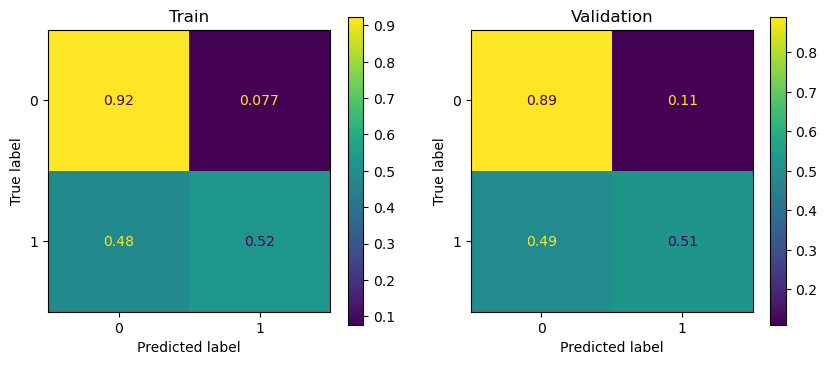

In [29]:
# Generación de la matriz de confusión
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

train_val_cm = confusion_matrix(Y_train, train_preds, labels = grid.best_estimator_.classes_, normalize = 'true')
train_val_disp = ConfusionMatrixDisplay(confusion_matrix = train_val_cm, display_labels = grid.best_estimator_.classes_)
train_val_disp.plot(ax = axes[0])
axes[0].set_title('Train')

test_cm = confusion_matrix(Y_validation, valid_preds, labels = grid.best_estimator_.classes_, normalize = 'true')
test_disp = ConfusionMatrixDisplay(confusion_matrix = test_cm, display_labels = grid.best_estimator_.classes_)
test_disp.plot(ax = axes[1])
axes[1].set_title('Validation')

plt.show()

In [30]:
# Métricas de evaluación del modelo para el set de entrenamiento
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3536
           1       0.71      0.52      0.60      1264

    accuracy                           0.82      4800
   macro avg       0.78      0.72      0.74      4800
weighted avg       0.81      0.82      0.81      4800



In [31]:
# Métricas de evaluación del modelo para el set de validación
print(classification_report(Y_validation, valid_preds))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       872
           1       0.64      0.51      0.57       328

    accuracy                           0.79      1200
   macro avg       0.73      0.70      0.71      1200
weighted avg       0.78      0.79      0.78      1200



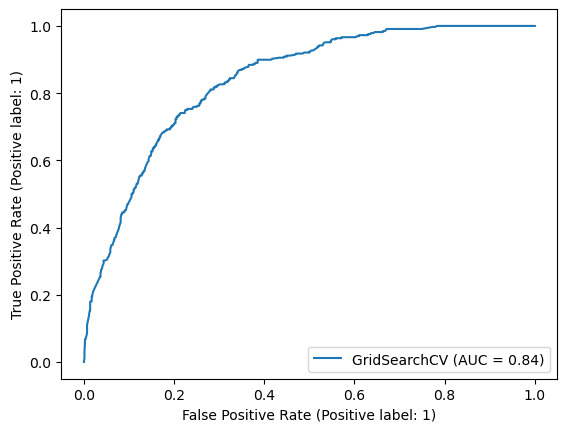

In [32]:
# Comportamiento de la variable ROC_AUC
plot_roc_curve(grid, X_validation, Y_validation)

De acuerdo con lo anterior, entre los 5 algoritmos de clasificación implementados, el modelo que se comportó mejor fue el XGBoost Classifier, con criterio gini y 9 n_estimators. No se evidencias problemas de overfitting, ya que el modelo tuvo un comportamiento similar tanto al entrenarlo como al probarlo. Por otro lado, aunque el modelo tiene una buena probabilidad de predecir los valores negativos de abondono de sus clientes, los casos que más le interesa (los casos positivos) los estima correctamente en un 52%, y por ello podría decirse que si cae en problemas de underfitting. 

Para elegir el mejor modelo se eligió la métrica ROC-AUC, la cual tiene la ventaja que indica qué tan exitoso es el modelo para diferenciar entre clientes que no están considerando abandonar los servicios de la empresas de telecomunicaciones y los que sí lo harán. 

La métrica ROC-AUC es útil debido a que nos dan mayor información sobre la sensibilidad y especificidad del modelo comparado con otras métricas como Precision, F1 o Recall. En especial, las curvas ROC-AUC nos permite:
* Comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador.
* El área debajo* de la curva (AUC) puede ser utilizado como resumen de la calidad del modelo.

Mientras que otros modelos como “Precision” nos dan una arista de evaluación: Por ejemplo, Precision nos da el porcentaje de True Possitive sobre el total de positivos (% positividad)

### 3.3. Exportación del modelo

In [34]:
#dump(grid.best_estimator_, '/churn-v1.0.joblib') 
dump(grid.best_estimator_, './datos/churn-v1.2.joblib') 

['./datos/churn-v1.2.joblib']